# Stock market Risk Analysis for Apple's Stock Prices

The Visualisations in this project have been made using the Plotly package which may not be visible In github repository, To see those plots or the complete program with visualisation You can click on the link in README.md file.

#### Importing Essential Libraries and packages

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
import plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

In [2]:
from plotly.offline import init_notebook_mode, plot, iplot, download_plotlyjs
init_notebook_mode(connected = True)

#### Importing Stock market data from the Internet

In [3]:
import pandas_datareader.data as web

In [4]:
from datetime import datetime

In [5]:
# Setting the Start and End date for Stock Market Analysis
# Data of past 2 year

end = datetime.now()
start = datetime(end.year-2,end.month,end.day)

In [6]:
# Importing Apple's Stock Prices

APPLE = web.DataReader('AAPL','yahoo',start,end)

In [7]:
APPLE.to_csv('APPLE.csv')

In [8]:
APPLE = pd.read_csv('APPLE.csv')

In [9]:
APPLE

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-09-04,57.294998,56.657501,57.102501,57.090000,109560400.0,55.665325
1,2018-09-05,57.417500,56.275002,57.247501,56.717499,133332000.0,55.302128
2,2018-09-06,56.837502,55.325001,56.557499,55.775002,137160000.0,54.383144
3,2018-09-07,56.342499,55.177502,55.462502,55.325001,150479200.0,53.944374
4,2018-09-10,55.462502,54.117500,55.237499,54.582500,158066000.0,53.220398
...,...,...,...,...,...,...,...
498,2020-08-26,126.992500,125.082497,126.180000,126.522499,163022400.0,126.522499
499,2020-08-27,127.485001,123.832497,127.142502,125.010002,155552400.0,125.010002
500,2020-08-28,126.442497,124.577499,126.012497,124.807503,187630000.0,124.807503
501,2020-08-31,131.000000,126.000000,127.580002,129.039993,225702700.0,129.039993


In [10]:
APPLE['Date'] = pd.to_datetime(APPLE['Date'])

In [11]:
# Checking if there are any null values or not

APPLE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       503 non-null    datetime64[ns]
 1   High       503 non-null    float64       
 2   Low        503 non-null    float64       
 3   Open       503 non-null    float64       
 4   Close      503 non-null    float64       
 5   Volume     503 non-null    float64       
 6   Adj Close  503 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 27.6 KB


In [12]:
APPLE.describe()

,High,Low,Open,Close,Volume,Adj Close
count,503.000000,503.000000,503.000000,503.000000,5.030000e+02,503.000000
mean,63.027137,61.584170,62.254379,62.366700,1.398888e+08,61.754127
std,19.364983,18.833704,19.071081,19.175020,6.410072e+07,19.422856
min,36.430000,35.500000,35.994999,35.547501,4.544800e+07,34.781353
25%,49.763750,48.482500,49.108749,49.250000,9.650020e+07,48.488377
50%,56.057499,54.860001,55.537498,55.555000,1.244968e+08,54.563526
75%,74.610001,71.602501,72.486248,73.196251,1.644680e+08,72.867264
max,134.800003,130.529999,132.759995,134.179993,4.268848e+08,134.179993


## Data Visualization

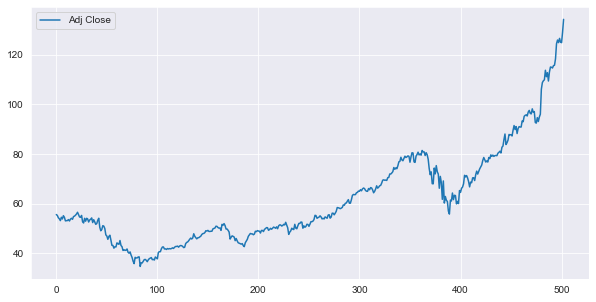

In [13]:
# Plotting Adjusted Closing price for Apple's Stock

APPLE['Adj Close'].plot(legend=True,figsize=(10,5))
plt.show()

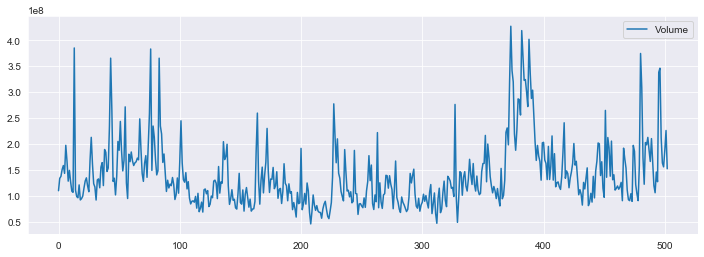

In [14]:
# Plotting Volume for Tesla Motors Stock

APPLE['Volume'].plot(legend=True,figsize=(12,4))
plt.show()

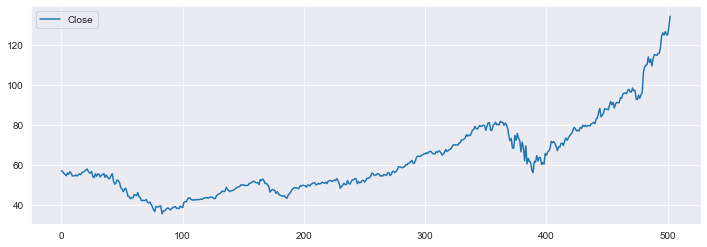

In [15]:
# Plotting Closing price for Tesla Motors Stock

APPLE['Close'].plot(legend=True,figsize=(12,4))
plt.show()

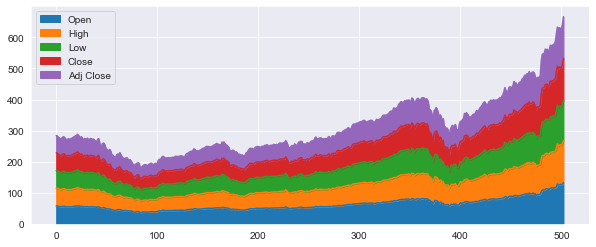

In [16]:
APPLE[['Open','High','Low','Close','Adj Close']].plot(kind = 'area',figsize = (10,4))
plt.show()

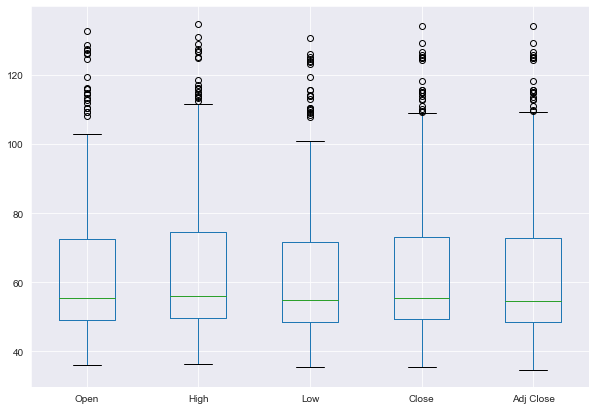

In [17]:
APPLE[['Open','High','Low','Close','Adj Close']].plot(kind = 'box',figsize = (10,7))
plt.show()

In [18]:
# setting layout
layout = go.Layout(title = "Apple's Stock Prices", xaxis = dict(title = 'Date'), yaxis = dict(title = 'Price'))

 ### Apple's Stock Prices

In [19]:
df1 = [{'x' : APPLE['Date'], 'y' : APPLE['Adj Close']}]
fig0 = go.Figure(data = df1, layout = layout)
iplot(fig0)

In [20]:
APPLE.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-09-04,57.294998,56.657501,57.102501,57.090000,109560400.0,55.665325
1,2018-09-05,57.417500,56.275002,57.247501,56.717499,133332000.0,55.302128
2,2018-09-06,56.837502,55.325001,56.557499,55.775002,137160000.0,54.383144
3,2018-09-07,56.342499,55.177502,55.462502,55.325001,150479200.0,53.944374
4,2018-09-10,55.462502,54.117500,55.237499,54.582500,158066000.0,53.220398


### Applying Machine Learning Model for Predictions

#### Identifying Dependent and Independent Variable

In [21]:
X = APPLE.drop(['Date','Close','Adj Close'],axis = 1)
Y = APPLE['Adj Close']

In [22]:
X

,High,Low,Open,Volume
0,57.294998,56.657501,57.102501,109560400.0
1,57.417500,56.275002,57.247501,133332000.0
2,56.837502,55.325001,56.557499,137160000.0
3,56.342499,55.177502,55.462502,150479200.0
4,55.462502,54.117500,55.237499,158066000.0
...,...,...,...,...
498,126.992500,125.082497,126.180000,163022400.0
499,127.485001,123.832497,127.142502,155552400.0
500,126.442497,124.577499,126.012497,187630000.0
501,131.000000,126.000000,127.580002,225702700.0


In [23]:
Y

0       55.665325
1       55.302128
2       54.383144
3       53.944374
4       53.220398
          ...    
498    126.522499
499    125.010002
500    124.807503
501    129.039993
502    134.179993
Name: Adj Close, Length: 503, dtype: float64

#### Splitting Data Into test and Train Set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### Performing feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Using Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
Y_pred = regressor.predict(X_test)

#### Evaluation for model

In [28]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs

In [29]:
score = f'''
{'Metric'.ljust(18)}{'Train'.center(22)}{'Test'.center(22)}
{'R_Square_Score'.ljust(18)}{rs(y_train,regressor.predict(X_train))}\t{rs(y_test,regressor.predict(X_test))}
{'MSE'.ljust(18)}{mse(y_train,regressor.predict(X_train))}\t{mse(y_test,regressor.predict(X_test))}
'''
print(score)


Metric                    Train                  Test         
R_Square_Score    0.9991583705963145	0.9990158178468171
MSE               0.3219727583447593	0.3467800656789843



#### Visualization and Comparison of True And Predicted STock Prices.

In [30]:
import plotly.graph_objects as go
trace1 = go.Scatter(x = X_train.T[0], y = y_train, mode = 'markers', name = 'TRUE')
trace2 = go.Scatter(x = X_train.T[0], y = regressor.predict(X_train).T, mode = 'markers', name = 'PREDICTED')

df = [trace1,trace2]
layout.xaxis.title.text = ' '
fig = go.Figure(data = df, layout = layout)

In [35]:
iplot(fig)